# Machine Learning & Statistics Project 2019

Peter McGowan
G00190832

## Introduction
This jupyter notebook contains an investigation of the Boston House Prices dataset for the "Machine-Learnign and Statistics" Module on the GMIT HDip in Data Analytics.

## Background
***Add background info here***

## Starting Off
First we will import the required python libraries.

In [1]:
# Import pandas for managing data
# Import scipy.stats for statistical analysis
# Impost keras for working with neural networks
# Import matplotlib.pyplot and seaborn for visualisations
import pandas as pd
import scipy.stats as ss
import statsmodels.stats.weightstats as ws
#import keras as k
import matplotlib.pyplot as plt
import seaborn as sns

scikit-learn conveniently provides the Boston House Prices dataset - we will now load it.

** change this to import from keras?

In [2]:
# Load the boston dataset from sklearn
from sklearn.datasets import load_boston
boston = load_boston()

Check the keys of the dataset #Research this

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


The pandas library includes a versatile "dataframe" object - an indexed array that helps with managing multi-dimensional data.

In [4]:
# Create a dataframe from the boston house prices dataset
df = pd.DataFrame(boston.data, columns=boston.feature_names)

## Describe

### Checks & Descriptive Statistics

We'll have a look at the head and tail of the data first of all to check for any obvious issues

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


We shoud check also for missing values:

In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

All seems to be in order so far.

What do the column headers mean? We can use the following command to dive into it:

In [8]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The MEDV column wasn't included in the earlier outputs.
This is because scikit-learn assumes that you wish to use it as the 'target' of the dataset.
We can check that its included:

In [9]:
print(boston.target.shape)

(506,)


This matches the output of the DESCR command so it should be ok.
Now we need to add it as a column to the dataframe to make our lives a bit easier later on.

In [10]:
df['MEDV'] = boston.target

Now output the summary statistics of the dataframe to see how it looks:

In [11]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


The data seems to have imported correctly and we now have it in a format that we can work with.

### Visualisations
Now we can start creating plots.
Firstly, the distribution of the Median House Value:

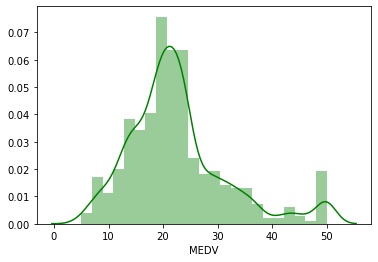

In [12]:
sns.distplot(df['MEDV'], color='g')

We can also look at the number of rooms per dwelling like this.

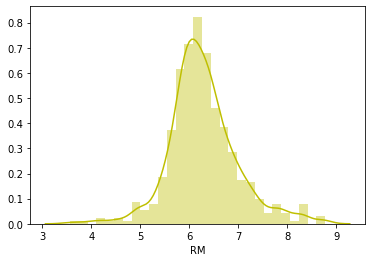

In [13]:
sns.distplot(df['RM'], color='y')

What about the relationships between some of the statistics and the median house value?
Firstly we look at DIS:

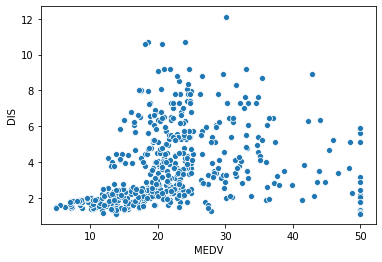

In [14]:
sns.scatterplot(x='MEDV', y='DIS', data=df)

It is difficult to tell if a definite linear relationship exists between these variables, but an unusual vertical line of values on the MEDV=50 line stand out somewhat.

We can look at RAD also:

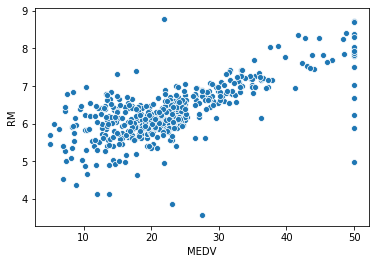

In [15]:
sns.scatterplot(x='MEDV', y='RM', data=df)

The linear relationship is much more apparent here - however the clustering of points on the MEDV=50 mark is even more apparent in this plot. This will require further investigation. 

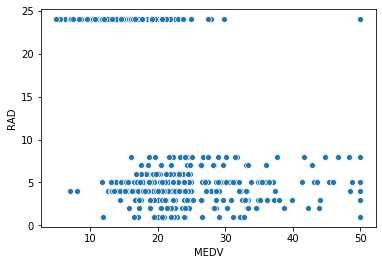

In [16]:
sns.scatterplot(x='MEDV', y='RAD', data=df)

This is quite a bit different to the other plots - the RAD value refers to "index of accessibility to major highways" - it appears that there is a broad range of houses values that have an accessibility rating between 0 and 10, then a very large gap, with a range of houses in the low- to medium price range (with a single high price outlier) with a much higher index of around 24.

Next, we can use a box and whisker plot to look at some of the descriptive statistics of the variables.

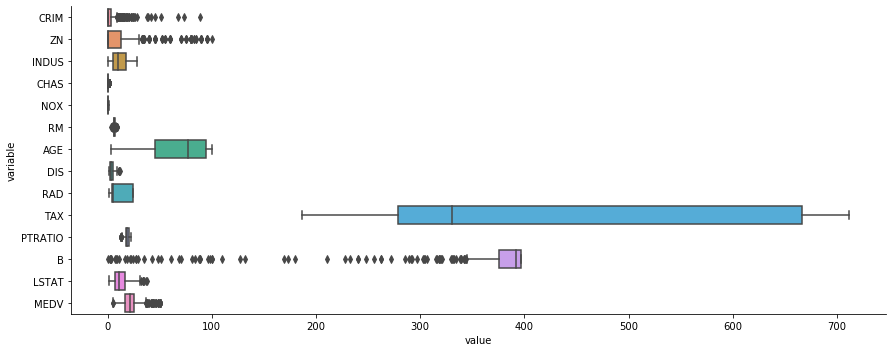

In [17]:
#sns.boxplot(x='value', y='variable', data=pd.melt(df), height = 5)
g = sns.catplot(x='value', y='variable', data=pd.melt(df), kind='box', height=5, aspect=2.5);

Clearly, they all have very distinctive characteristics - but we already have most of this information in numerical format. What this really tells us is that certain (most) variables have a good number of outliers - this will be a consideration in development of our neural network later.

## Infer

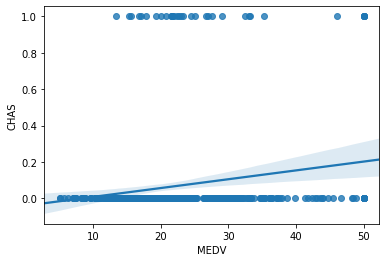

In [18]:
sns.regplot(x='MEDV', y='CHAS', data=df)

*** Add a violin plot?? ***

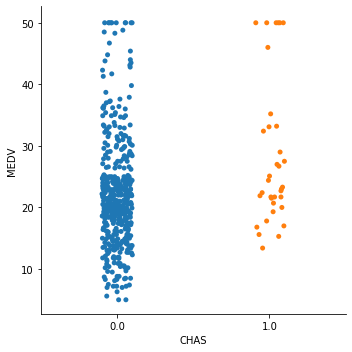

In [19]:
sns.catplot(x='CHAS', y='MEDV',  data=df)

Now lets visualise the distribution of this using histograms with KDEs overlaid on the same plot:

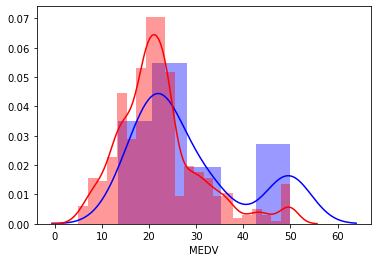

In [20]:
# Extract subsets of the dataframe for houses on the Charles River (ry) vs houses not on it (rn)
ry = df.loc[df['CHAS'] == 1]
rn = df.loc[df['CHAS'] == 0]

# Overlay a distplot for each on the same plot for comparison
sns.distplot(ry['MEDV'], color='b')
sns.distplot(rn['MEDV'], color='r')

Although the histograms of the two data sets look quite different, the shapes of the kernal density estimate plots are not dissimilar - although it can be said with reasonable confidence that the values of houses on the Charles River appear to be generally higher than those not on it. We will have to confirm this now by carrying out statistical tests using scipy.

### T-Test

We can carry out a t-test using scipy.stats to check if there is a significant difference in median house prices between those along the Charles River and those that are not. We need to use an independent t-test.

*** should confirm that the t-test assumptions are met?

The null hypothesis here is that the means are equal. Therefore if there is no significant difference between the means, the t-statistic should be close to 0.

First we need MEDV split into two separate sets - one where CHAS=0 and one where CHAS=1. This has already been carried out to generate the histograms above:
* rn = dataframe containing only data on houses not along the Charles River
* ry = dataframe containing only data on houses along the Charles River

In [21]:
ss.ttest_ind(rn['MEDV'], ry['MEDV'])

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

Results:
* t-Statistic: -3.996
* p-value: 7.391e<sup>-5</sup>

We can also check this by carrying out the t-test using statsmodel instead:

In [22]:
ws.ttest_ind(rn['MEDV'], ry['MEDV'])

(-3.9964374660905095, 7.390623170519883e-05, 504.0)

The results are identical - with the inclusion of the degrees of freedom (504).

#### p-value
We generally accept a p-value of 0.5 as being the lower bound of whether a relationship is significant or not. Our calculated p-value is sinificantly lower than this, we can therefore conclude that there is a significant difference between the means - in other words we reject the null hypothesis and can state that there is a significant difference in median house prices between those on the Charles River and those not on it.

** find reference for the above?

### Conclusions

We can conclude that the difference in the means is statistically significant. However we should caveat this - earlier we noted that an issue with the MEDV values - the distribution of the values indicate that the value above 50 have been truncated for some reason, this would certainly have an effect on the means.

## Predict

We will now use the keras package to create a neural network to predict the median house price based on the datasets other variables.

In [23]:
import keras as kr
import numpy as np

Using TensorFlow backend.


** need to choose variables to predict with - ideally those that correlate with the house price, may be of interest to choose several with varying degrees of correlation

### Choosing Correlated Variables

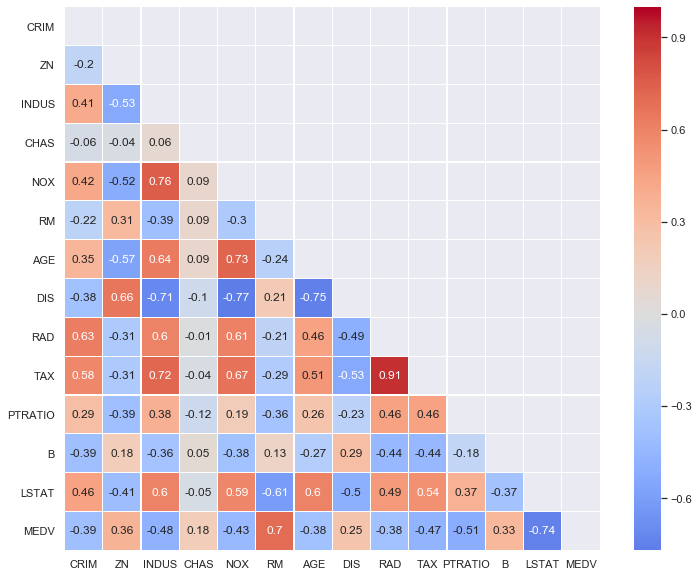

In [24]:
# Seaborn heatmap
sns.set(style='dark')

# Mask upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (12,10))
sns.heatmap(df.corr().round(2), annot=True, mask=mask, cmap='coolwarm', center=0, linewidths=0.2)

Results: 10 fields most strongly correlated with MEDV are:
* CRIM: -0.39
* ZN: 0.36
* INDUS: -0.48
* NOX: -0.43
* RM: 0.7
* RAD: -0.38
* TAX: -0.47
* PTRATIO: -0.51
* B: 0.33
* LSTAT: -0.74
    
We can use these as inputs for the model.

** need to decide on layers, numbers of neurons

In [25]:
#inputs = df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

In [26]:
inputs = df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
inputs.describe()

,CRIM,ZN,INDUS,NOX,RM,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.115878,0.702617,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.385000,3.561000,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,0.871000,8.780000,24.000000,711.000000,22.000000,396.900000,37.970000


*** need to normalise?

In [27]:
outputs = df['MEDV']

### Split Dataset

We need to split the dataset into a training dataset and a predictions dataset.

In [28]:
import sklearn.model_selection as mod

In [29]:
# Split the inputs and outputs into training and test sets.
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.2)

In [30]:
print(inputs_train.describe())
print(inputs_test.describe())

             CRIM          ZN       INDUS         NOX          RM         RAD  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     3.636753   11.525990   11.336733    0.558460    6.286995    9.693069   
std      8.087281   23.567914    6.876484    0.118339    0.726874    8.766893   
min      0.006320    0.000000    0.460000    0.385000    3.561000    1.000000   
25%      0.082155    0.000000    5.320000    0.453000    5.878750    4.000000   
50%      0.286735    0.000000    9.795000    0.538000    6.197500    5.000000   
75%      3.790445   12.500000   18.100000    0.631000    6.632000   24.000000   
max     88.976200   95.000000   27.740000    0.871000    8.780000   24.000000   

              TAX     PTRATIO           B       LSTAT  
count  404.000000  404.000000  404.000000  404.000000  
mean   410.970297   18.438614  353.649703   12.791436  
std    169.447545    2.157610   94.497697    7.400068  
min    188.000000   12.600000    2.520000    1

In [31]:
print(outputs_train.describe())
print(outputs_test.describe())

count    404.000000
mean      22.586881
std        9.547091
min        5.000000
25%       16.500000
50%       20.950000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64
count    102.000000
mean      22.318627
std        7.693520
min        5.000000
25%       18.200000
50%       21.750000
75%       24.950000
max       45.400000
Name: MEDV, dtype: float64


In [32]:
inputs_test.iloc[0]

CRIM         0.09178
ZN           0.00000
INDUS        4.05000
NOX          0.51000
RM           6.41600
RAD          5.00000
TAX        296.00000
PTRATIO     16.60000
B          395.50000
LSTAT        9.04000
Name: 173, dtype: float64

### Build Neural Network

#### Preprocessing

*** https://scikit-learn.org/stable/modules/preprocessing.html
*** http://www.faqs.org/faqs/ai-faq/neural-nets/part2/section-16.html

Preprocessing can help models to run more accurately and effectively by preparing the data into a more suitable form.

##### Scaling

In [33]:
from sklearn import preprocessing

In [34]:
#inputs_scaled = preprocessing.scaler.fit_transform(inputs_train[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']])

In [35]:
scaler = preprocessing.MinMaxScaler()

*** http://benalexkeen.com/feature-scaling-with-scikit-learn/

In [36]:
inputs_train_scaled = pd.DataFrame(scaler.fit_transform(inputs_train), columns=inputs.columns)

In [37]:
inputs_train_scaled.describe()

,CRIM,ZN,INDUS,NOX,RM,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.040805,0.121326,0.398707,0.356913,0.522321,0.377960,0.426329,0.621129,0.890333,0.305227
std,0.090899,0.248083,0.252071,0.243497,0.139275,0.381169,0.323991,0.229533,0.239611,0.204196
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000852,0.000000,0.178152,0.139918,0.444098,0.130435,0.175430,0.468085,0.938860,0.145075
50%,0.003152,0.000000,0.342192,0.314815,0.505173,0.173913,0.275335,0.680851,0.984926,0.265728
75%,0.042533,0.131579,0.646628,0.506173,0.588427,1.000000,0.913958,0.808511,0.997578,0.425566
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
inputs_test_scaled = pd.DataFrame(scaler.fit_transform(inputs_test), columns=inputs.columns)

In [39]:
inputs_test_scaled.describe()

,CRIM,ZN,INDUS,NOX,RM,RAD,TAX,PTRATIO,B,LSTAT
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.047748,0.107206,0.343330,0.312828,0.573534,0.346974,0.401549,0.630058,0.928773,0.330530
std,0.141970,0.224249,0.255624,0.217385,0.142671,0.368924,0.315376,0.234387,0.193050,0.215020
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000874,0.000000,0.108909,0.117739,0.484249,0.130435,0.170324,0.553191,0.967894,0.150948
50%,0.002801,0.000000,0.275953,0.275934,0.561341,0.173913,0.257634,0.691489,0.989107,0.300823
75%,0.034661,0.093750,0.636089,0.464212,0.640038,0.304348,0.477099,0.808511,1.000000,0.452398
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Whitening

In [40]:
#from sklearn.decomposition import PCA
import sklearn.decomposition as dec

In [41]:
pca = dec.PCA(n_components=10, whiten=True)
pca.fit(inputs_train_scaled)
inputs_train_white = pd.DataFrame(pca.transform(inputs_train_scaled), columns=inputs.columns)
inputs_train_white.describe()

,CRIM,ZN,INDUS,NOX,RM,RAD,TAX,PTRATIO,B,LSTAT
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,7.254923e-17,2.107775e-16,-7.172480e-17,5.661038e-16,-2.333117e-16,-2.929450e-16,-2.129760e-16,6.506072e-16,1.538923e-17,-2.154836e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.724186e+00,-2.454550e+00,-1.329370e+00,-1.971454e+00,-2.454556e+00,-2.806659e+00,-2.193328e+00,-3.591250e+00,-3.575491e+00,-1.622642e+00
25%,-7.664203e-01,-6.956624e-01,-6.955347e-01,-5.677947e-01,-6.505081e-01,-5.987517e-01,-7.073878e-01,-5.474128e-01,-5.609520e-01,-3.555957e-01
50%,-4.155852e-01,2.932091e-02,-2.958203e-01,-2.294341e-03,-8.117330e-02,-5.572564e-02,-1.336919e-01,3.921366e-02,-5.484551e-02,-2.409893e-02
75%,1.243283e+00,6.307438e-01,4.223422e-01,4.375512e-01,5.609314e-01,5.267090e-01,7.148054e-01,6.226042e-01,5.421738e-01,1.950066e-01
max,1.996895e+00,2.678494e+00,3.996979e+00,3.634920e+00,3.073537e+00,3.729855e+00,2.799348e+00,5.136835e+00,3.973212e+00,1.295944e+01


In [42]:
#pca = dec.PCA(n_components=10, whiten=True)
pca.fit(inputs_test_scaled)
inputs_test_white = pd.DataFrame(pca.transform(inputs_test_scaled), columns=inputs.columns)
inputs_test_white.describe()

,CRIM,ZN,INDUS,NOX,RM,RAD,TAX,PTRATIO,B,LSTAT
count,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02
mean,2.517050e-16,9.578395e-17,-5.934795e-16,4.310278e-16,-6.095342e-17,-1.382337e-16,-3.417745e-16,-3.853127e-16,3.483053e-16,-6.160649e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.342495e+00,-2.048356e+00,-2.960981e+00,-1.330656e+00,-2.193893e+00,-2.499537e+00,-2.820170e+00,-3.461271e+00,-2.726941e+00,-2.514287e+00
25%,-7.703144e-01,-6.810024e-01,-5.592627e-01,-4.778517e-01,-6.457374e-01,-6.124009e-01,-6.104879e-01,-4.484316e-01,-6.883935e-01,-7.196743e-01
50%,-3.853099e-01,-7.551265e-02,-5.843271e-02,-5.842836e-02,-1.149108e-01,-1.784836e-01,8.527805e-02,-1.229809e-01,-1.820435e-02,-8.558917e-02
75%,5.718132e-01,5.858571e-01,2.442322e-01,2.656332e-01,5.957581e-01,5.903366e-01,5.847829e-01,2.916898e-01,6.402675e-01,6.986566e-01
max,2.052169e+00,2.910093e+00,4.108525e+00,4.940570e+00,2.785116e+00,3.530322e+00,3.437306e+00,5.121604e+00,3.245375e+00,3.143496e+00


#### Keras

In [43]:
# Create a new neural network.
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

*** https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f

There are many different ways to build a neural network, the accuracy will depend on the approach we take.

*** https://www.dlology.com/blog/quick-notes-on-how-to-choose-optimizer-in-keras/
*** https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
*** https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f

##### Defining Functions

It will be useful to create some functions now as some of the following work will be repetitive.

In [44]:
# Function that carries out the keras.evaluate() function and prints to a specified format
def evaluator(evalN, modelN):
    evalN = modelN.evaluate(inputs_test_white, outputs_test, verbose=0)
    print('This model evaluates as:')
    print('* Loss:', evalN[0])
    print('* MAE:', evalN[1])
    print('* Accuracy:', evalN[2])

In [45]:
# Function that carries out the keras.predict() function and prints to a specified format
def predictor(predN, modelN):
    predN = modelN.predict(inputs_test_white.as_matrix()[0:1])
    print('This model predicts as:')
    print('* Predicted Value:', predN[0][0])
    print('* Actual value:', outputs_test[0:1].iloc[0])

#### First Attempt

This will be a three layer neural network with densities of 100, 50 and 1.

##### Construct Model

In [46]:
model1 = Sequential() 

model1.add(Dense(units=100, activation='relu', input_dim=10))
model1.add(Dense(units=25, activation='relu'))
model1.add(Dense(units=1))

model1.compile(loss='mse', optimizer='adam', metrics=['mae', 'acc'])

model1.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_2 (Dense)              (None, 25)                2525      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 3,651
Trainable params: 3,651
Non-trainable params: 0
_________________________________________________________________


*** https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

In [61]:
earlystop = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
history1 = model1.fit(inputs_train_white, outputs_train, epochs=1500)

Epoch 1/1500
404/404 [==============================] - 0s 41us/step - loss: 0.5796 - mae: 0.4625 - acc: 0.1015
Epoch 2/1500
404/404 [==============================] - 0s 39us/step - loss: 0.5900 - mae: 0.4788 - acc: 0.1089
Epoch 3/1500
404/404 [==============================] - 0s 39us/step - loss: 0.6066 - mae: 0.5056 - acc: 0.0916
Epoch 4/1500
404/404 [==============================] - 0s 39us/step - loss: 0.6795 - mae: 0.5502 - acc: 0.0866
Epoch 5/1500
404/404 [==============================] - 0s 39us/step - loss: 0.5754 - mae: 0.4889 - acc: 0.1064
Epoch 6/1500
404/404 [==============================] - 0s 0us/step - loss: 0.5870 - mae: 0.4979 - acc: 0.0965
Epoch 7/1500
404/404 [==============================] - 0s 0us/step - loss: 0.5309 - mae: 0.4512 - acc: 0.1188
Epoch 8/1500
404/404 [==============================] - 0s 39us/step - loss: 0.5901 - mae: 0.4959 - acc: 0.0965
Epoch 9/1500
404/404 [==============================] - 0s 39us/step - loss: 0.5579 - mae: 0.4662 - acc: 0

In [48]:
evaluate1 = []
evaluator(evaluate1, model1)

This model evaluates as:
* Loss: 64.12267819572898
* MAE: 5.687864303588867
* Accuracy: 0.019607843831181526


In [49]:
predict1 = []
predictor(predict1, model1)

This model predicts as:
* Predicted Value: 30.610523
* Actual value: 23.6


C:\Users\Peter McGowan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


##### Results

Our basic, three layer model run with the data as-is didn't perform particularly well, although it was converging towards a solution. Normalising the data definitely made a significant improvement. We can now move on to developing the structure of the model itself to improve the accuracy.

#### Second Attempt - Deepen

We will develop the second attempt model and deepen it now by adding another hidden layer.

##### Construct Model

In [50]:
model2 = Sequential() 

model2.add(Dense(units=100, activation='relu', input_dim=10))
model2.add(Dense(units=50, activation='relu'))
model2.add(Dense(units=25, activation='relu'))
model2.add(Dense(units=1))

model2.compile(loss='mse', optimizer='adam', metrics=['mae', 'acc'])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_6 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 26        
Total params: 7,451
Trainable params: 7,451
Non-trainable params: 0
_________________________________________________________________


##### Training

In [51]:
history2 = model2.fit(inputs_train_white, outputs_train, epochs=1500)

Epoch 1/1500
404/404 [==============================] - 0s 273us/step - loss: 589.8091 - mae: 22.3277 - acc: 0.0000e+00
Epoch 2/1500
404/404 [==============================] - 0s 39us/step - loss: 543.5347 - mae: 21.2644 - acc: 0.0000e+00
Epoch 3/1500
404/404 [==============================] - 0s 39us/step - loss: 489.5487 - mae: 19.9426 - acc: 0.0025
Epoch 4/1500
404/404 [==============================] - 0s 39us/step - loss: 404.5797 - mae: 17.6686 - acc: 0.0025
Epoch 5/1500
404/404 [==============================] - 0s 39us/step - loss: 265.3881 - mae: 13.6729 - acc: 0.0000e+00
Epoch 6/1500
404/404 [==============================] - 0s 0us/step - loss: 125.6060 - mae: 8.8824 - acc: 0.0000e+00
Epoch 7/1500
404/404 [==============================] - 0s 39us/step - loss: 68.3878 - mae: 6.4147 - acc: 0.0025
Epoch 8/1500
404/404 [==============================] - 0s 39us/step - loss: 47.1692 - mae: 5.0338 - acc: 0.0074
Epoch 9/1500
404/404 [==============================] - 0s 39us/step 

This is a noticeable improvement over the first model. It is converging more quickly, but perhaps we should increase the number of epochs to assess its accuracy.

In [52]:
evaluate2 = []
evaluator(evaluate2, model2)

This model evaluates as:
* Loss: 56.104123283835015
* MAE: 5.832066535949707
* Accuracy: 0.009803921915590763


In [53]:
predict2 = []
predictor(predict2, model2)

This model predicts as:
* Predicted Value: 25.64281
* Actual value: 23.6


C:\Users\Peter McGowan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


##### Results

Deepening the model by adding another hidden layer has helped to increase the accuracy - therefore we can be reasonably confident that deeping the model is effective. 

#### Third Attempt - Widen

We will develop the model more and widen it now by doubling the number of units in each hidden layer.

##### Construct Model

In [54]:
model3 = Sequential() 

model3.add(Dense(units=150, activation='relu', input_dim=10))
model3.add(Dense(units=100, activation='relu'))
model3.add(Dense(units=50, activation='relu'))
model3.add(Dense(units=1))

model3.compile(loss='mse', optimizer='adam', metrics=['mae', 'acc'])

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 150)               1650      
_________________________________________________________________
dense_9 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_10 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 51        
Total params: 21,851
Trainable params: 21,851
Non-trainable params: 0
_________________________________________________________________


##### Training

In [55]:
history3 = model3.fit(inputs_train_white, outputs_train, epochs=500)

Epoch 1/500
404/404 [==============================] - 0s 309us/step - loss: 561.7679 - mae: 21.6560 - acc: 0.0000e+00
Epoch 2/500
404/404 [==============================] - 0s 39us/step - loss: 431.7409 - mae: 18.2606 - acc: 0.0000e+00
Epoch 3/500
404/404 [==============================] - 0s 39us/step - loss: 204.9005 - mae: 11.1861 - acc: 0.0000e+00
Epoch 4/500
404/404 [==============================] - 0s 39us/step - loss: 100.5692 - mae: 7.5886 - acc: 0.0050
Epoch 5/500
404/404 [==============================] - 0s 0us/step - loss: 53.0814 - mae: 5.3142 - acc: 0.0124
Epoch 6/500
404/404 [==============================] - 0s 39us/step - loss: 36.9152 - mae: 4.2414 - acc: 0.0173
Epoch 7/500
404/404 [==============================] - 0s 39us/step - loss: 30.6243 - mae: 3.8844 - acc: 0.0074
Epoch 8/500
404/404 [==============================] - 0s 39us/step - loss: 28.2585 - mae: 3.7147 - acc: 0.0149
Epoch 9/500
404/404 [==============================] - 0s 49us/step - loss: 25.8462 -

In [56]:
evaluate3 = []
evaluator(evaluate3, model3)

This model evaluates as:
* Loss: 55.16113879633885
* MAE: 5.624008655548096
* Accuracy: 0.029411764815449715


In [57]:
predict3 = []
predictor(predict3, model3)

This model predicts as:
* Predicted Value: 31.39395
* Actual value: 23.6


C:\Users\Peter McGowan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


##### Results

More accurate than all previous attempts:
* Loss (Mean Squared Error): ~8
* Mean Absolute Error: ~2.0
* Accuracy: 0.0272

##### Next Section

In [58]:
print(history1.history.keys())

dict_keys(['loss', 'mae', 'acc'])


In [59]:
print(model1.evaluate(inputs_test_white, outputs_test))
print(model2.evaluate(inputs_test_white, outputs_test))
print(model3.evaluate(inputs_test_white, outputs_test))

102/102 [==============================] - 0s 0us/step
[64.12267819572898, 5.687864303588867, 0.019607843831181526]
102/102 [==============================] - 0s 0us/step
[56.104123283835015, 5.832066535949707, 0.009803921915590763]
102/102 [==============================] - 0s 0us/step
[55.16113879633885, 5.624008655548096, 0.029411764815449715]


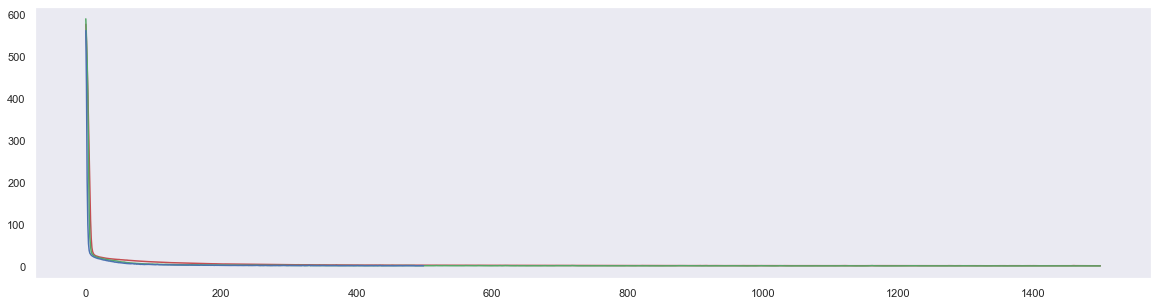

In [60]:
plt.figure(figsize=(20,5))
plt.plot(history1.history['loss'], color='r')
plt.plot(history2.history['loss'], color='g')
plt.plot(history3.history['loss'], color='b')

*** adjust the below to output what i want

*** https://keras.io/visualization/

*** https://www.tensorflow.org/guide/keras/train_and_evaluate
*** https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network